# Creating Graphs of Networks

In [2]:
import tensorflow as tf
from tensorflow.keras.utils import plot_model

2023-05-06 17:37:51.066993: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Dense, Flatten
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.metrics import SparseCategoricalAccuracy
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

## VAE Model

In [4]:
def create_autoencoder(input_shape):
    input_img = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

    # Decoder
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

    autoencoder = Model(input_img, decoded)
    return autoencoder

2023-05-06 17:37:59.260390: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


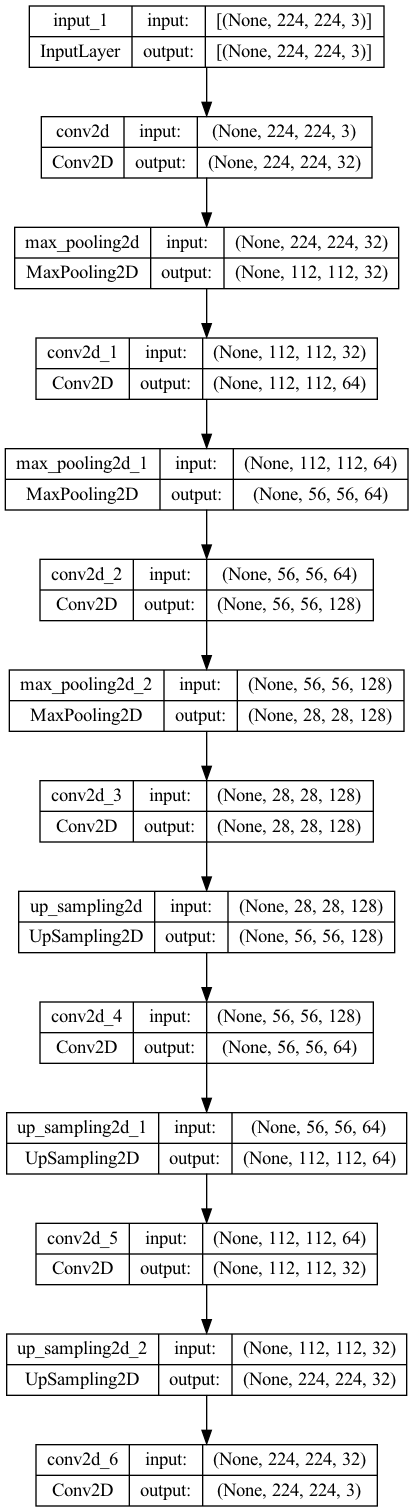

In [5]:
# Create the autoencoder model
input_shape = (224, 224, 3)  # Replace with the actual input shape of your images
autoencoder = create_autoencoder(input_shape)

# Visualize the model architecture
plot_model(autoencoder, to_file='autoencoder.png', show_shapes=True, show_layer_names=True, dpi=96)

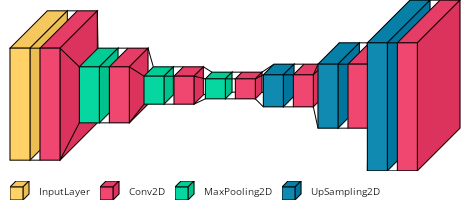

In [25]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("/Users/harshvardhan/Library/CloudStorage/Dropbox/Personal/personal-website/static/fonts/open-sans-v34-latin-regular.ttf", 10)
visualkeras.layered_view(autoencoder, legend=True, font=font, to_file='/Users/harshvardhan/Downloads/COSC525 Project Report/images/autoencoder.png')

## Classifier Model

In [27]:
def extract_encoder(autoencoder):
    # Extract the encoder layers from the autoencoder model
    input_img = autoencoder.input
    # Assuming the encoder layers are the first 5 layers
    encoded = autoencoder.layers[5].output

    # Create a new model with the encoder layers
    encoder = Model(input_img, encoded)

    return encoder

In [28]:
def create_classification_model(encoder, num_race_classes, num_age_classes, num_gender_classes):
    # Use the encoder's output as input for the classification model
    encoded_input = encoder.output

    # Add a Flatten layer to convert the feature maps into a 1D vector
    x = Flatten()(encoded_input)

    # Add Dense layers for classification
    x = Dense(256, activation='relu')(x)
    x = Dense(128, activation='relu')(x)

    # Add output layers for each attribute: race, age, and gender
    race_output = Dense(num_race_classes, activation='softmax', name='race_output')(x)
    age_output = Dense(num_age_classes, activation='softmax', name='age_output')(x)
    gender_output = Dense(num_gender_classes, activation='softmax', name='gender_output')(x)

    # Create the classification model
    classification_model = Model(encoder.input, [race_output, age_output, gender_output])

    return classification_model

In [30]:
encoder = extract_encoder(autoencoder)
classif = create_classification_model(encoder, 7, 9, 2)

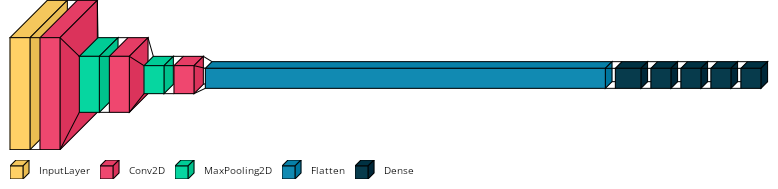

In [31]:
import visualkeras
from PIL import ImageFont
font = ImageFont.truetype("/Users/harshvardhan/Library/CloudStorage/Dropbox/Personal/personal-website/static/fonts/open-sans-v34-latin-regular.ttf", 10)
visualkeras.layered_view(classif, legend=True, font=font, to_file='/Users/harshvardhan/Downloads/COSC525 Project Report/images/classifier.png')

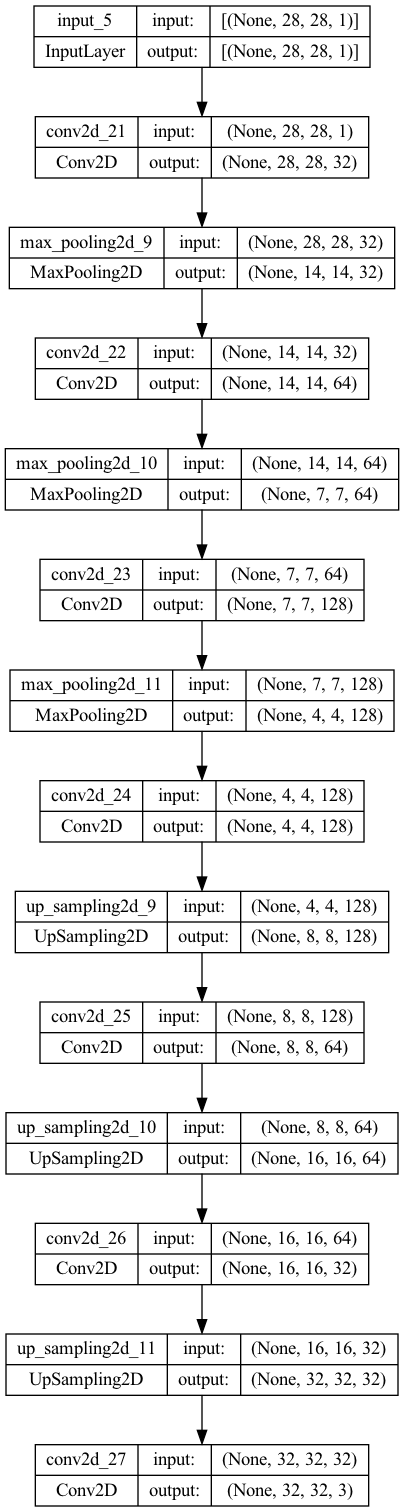

In [32]:
plot_model(autoencoder, to_file='classifier.png', show_shapes=True, show_layer_names=True, dpi=96)